## Predicting HIV Progression

About the competition- <br>
<br>
This contest focuses on using the nucleotide sequence of the Reverse Transcriptase (RT) and Protease (PR) to predict the patient's short-term progression. For the non-Biologist: the nucleotide sequence is the blueprint of the protein, which is the workhorse of the cell.  The RT enzyme is responsible for copying the HIV-1 genome within the cell. As the HIV-1 genome is translated it is in one long string of amino acids; the PR protein cuts this string into the numerous functional units - required by the HIV life-cycle. These are the proteins that are targeted by most HIV-1 drugs since they are mostly unique to the HIV-1 life-cycle.  <br>
Along with the HIV-1 viral sequences I have provided the two common clinical indicators used to determine the "general health" of an HIV-1 infected individual: Viral Load and CD4+ cell counts.  The CD4+ cell count is an estimate of the number of white-blood-cells in 1 mL of blood while the viral load is the number of viral particles in that same mL.  In this dataset the viral load is represented in a log-10 scale.  The higher the number the more "active" the immune system. Paradoxically higher CD4 counts imply both a healthier individual but also a higher amount of viral reproduction (the virus primarily replicates in CD4 cells).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np #library for working with arrays
import pandas as pd #library for data analysis and manupulation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#os is a library for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.
import os
#for loop iterates over each tuple yielded by os.walk().
for dirname, _, filenames in os.walk('/kaggle/input'):# yields a tuple of three values for each directory in the directory tree rooted at /kaggle/input
    for filename in filenames: #iterates over each filename in the list of filenames
        print(os.path.join(dirname, filename))#concatenates the directory path and the filename to form the full path to the file

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hivprogression/training_data.csv
/kaggle/input/hivprogression/hivprogression_solution.csv
/kaggle/input/hivprogression/test_data.csv


In [2]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('../input/hivprogression/training_data.csv') #reaading the training dataset using pandas library
test_data = pd.read_csv('../input/hivprogression/test_data.csv') #reading the test dataset using pandas library


In [3]:
train_data.head() #printing the first five rows of the training dataset

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.3,145
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.6,224
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.2,1017
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.7,206
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.5,572


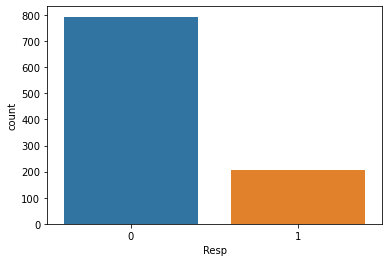

In [4]:
import seaborn as sns #high-level interface for data visualization
sns.countplot(train_data['Resp']) #plotting the resp column using count plot 
#count plot showa the counts of observations in each categorical bin using bars

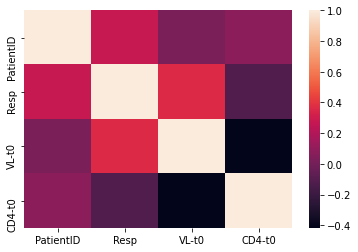

In [5]:
corr = train_data.corr() #finding the correlation between each regressors in the training dataset
sns.heatmap(corr) #plotting the correlation matrix of the training data

In [6]:
from sklearn.model_selection import train_test_split #library for splitting the data into train and test set
X = train_data[['VL-t0','CD4-t0']] #taking only the columns 'VL-t0' and 'CD4-t0' as independent variable
Y = train_data['Resp'].values #Taking the column 'Resp' as dependent variable
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2) 
#splitting the training and test data with the ratio of 70:30 by fixing the random state as 2

In [ ]:
#The KNeighborsClassifier is a type of classification algorithm that predicts the class of a new observation 
#by finding the k nearest neighbors to that observation in the training data, and then using a majority vote 
#among the k neighbors to determine the class of the new observation.

In [ ]:
#Accuracy score is used to measure the model performance in terms of measuring the ratio of sum of true positive and 
#true negatives out of all the predictions made.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating a k-nearest neighbors classifier
knn_model = KNeighborsClassifier()

# Train the classifier on the training set
knn_model.fit(x_train, y_train)

# Using knn classifier to predict labels for the test set
predicted = knn_model.predict(x_test)
print('KNN', accuracy_score(predicted, y_test))

KNN 0.7633333333333333


In [ ]:
#The RandomForestClassifier is a type of ensemble learning method that combines multiple decision trees to make predictions. 
#In a random forest, each tree is trained on a subset of the training data, and a random subset of the features is selected for each tree. 
#During prediction, each tree in the forest makes a prediction, and the final prediction is determined by a majority vote among the trees.

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random forest classifier
rfc_model = RandomForestClassifier()

# Train the classifier on the training set
rfc_model.fit(x_train, y_train)

# Using random forest classifier to predict labels for the test set
predicted = rfc_model.predict(x_test)
print('Random Forest', accuracy_score(y_test, predicted))

Random Forest 0.74


In [ ]:
#The SVC (Support Vector Classifier) is a type of SVM (Support Vector Machine) algorithm that is used for classification tasks. 
#SVMs are a class of supervised learning algorithms that can be used for both classification and regression tasks. 
#In SVMs, the goal is to find the hyperplane that best separates the different classes. The SVC algorithm in scikit-learn uses a
#variant of the SVM algorithm that allows for non-linearly separable data by using kernel functions.

In [9]:
from sklearn.svm import SVC

#Creating an support vector classifier model
svc_model = SVC(gamma='auto')

#Training the classifier model on training dataset
svc_model.fit(x_train, y_train)

#Using support vector classifier to predict labels for the test set
predicted = svc_model.predict(x_test)
print('SVM', accuracy_score(y_test, predicted))

SVM 0.7866666666666666


In [ ]:
#Gradient boosting is a popular machine learning technique that combines multiple weak models to create a strong model that can 
#make accurate predictions. The XGBClassifier is a specific implementation of gradient boosting for classification problems.

In [10]:
from xgboost import XGBClassifier

#creating Xgboost model
xgb_model = XGBClassifier()
#training the model on training set
xgb_model.fit(x_train, y_train)
#predicting the labels for the test set using xgboost classifier
predicted = xgb_model.predict(x_test)
print('XGBoost', accuracy_score(y_test, predicted))

XGBoost 0.7266666666666667


In [11]:
#Now predicting for validation set by extracting the columns 'VL-t0' and 'CD4-t0'
test = test_data[['VL-t0','CD4-t0']]
predict = svc_model.predict(test)

In [12]:
#creating a dataframe with two columns 'PatientID' and 'ResponderStatus'  
#The PatientID column contains a sequential range of integers from 1 to the number of rows in the predict array (inclusive), 
#and the ResponderStatus column contains the values in the predict array.

submissions = pd.DataFrame({
    'PatientID': np.arange(1,predict.shape[0]+1),
    'ResponderStatus': predict
})
submissions.to_csv('submission.csv', index=False)